<a href="https://colab.research.google.com/github/fahad-manzer/Neural-Network/blob/main/Neural_Network_Weather_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#LSTM RNNS
#d LSTM,(Long Short-Term Memory)

In [42]:
#importing the weather data 
#convert to GPU 

In [43]:
import keras
import pandas as pd
from zipfile import ZipFile
import os 
import numpy as np 

In [44]:
uri= "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path=keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file= ZipFile(zip_path)
zip_file.extractall()
csv_path="jena_climate_2009_2016.csv"
df=pd.read_csv(csv_path)
del zip_file

In [45]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [47]:
df=df.drop('Date Time',axis=1)
cols=['p','T','Tpot','Tdew','rh','VPmax','VPact','VPdef','sh','H2Oc','rho','wv','mwv','wd0']
df.columns=cols

In [48]:
#creating the lagged Dataset
y=df.loc[2*72:,'T']
lagged_x=[]
for lag in range (72,2*72,12):
  lagged=df.shift(lag)
  lagged.columns=[x + '.lag'+str(lag) for x in lagged.columns]
  lagged_x.append(lagged)

In [49]:
df=pd.concat(lagged_x,axis=1)
df=df.iloc[2*72:,:]   #drop missing values due to lags 

In [50]:
#Fitting the MinMaxScaer
#apply a min max scaler 
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [51]:
df

,p.lag72,T.lag72,Tpot.lag72,Tdew.lag72,rh.lag72,VPmax.lag72,VPact.lag72,VPdef.lag72,sh.lag72,H2Oc.lag72,...,rh.lag132,VPmax.lag132,VPact.lag132,VPdef.lag132,sh.lag132,H2Oc.lag132,rho.lag132,wv.lag132,mwv.lag132,wd0.lag132
0,0.851204,0.269365,0.259796,0.349543,0.879380,0.043298,0.090810,0.008476,0.087918,0.088865,...,0.925330,0.034543,0.077370,0.004347,0.074872,0.076017,0.756263,0.997175,0.997705,0.439722
1,0.850909,0.270526,0.260784,0.351621,0.882826,0.043617,0.091900,0.008259,0.088486,0.089936,...,0.925330,0.034702,0.077370,0.004347,0.075440,0.076017,0.756383,0.997195,0.997718,0.513333
2,0.850516,0.272019,0.262430,0.353491,0.881677,0.044094,0.092626,0.008259,0.089620,0.090650,...,0.929925,0.035339,0.079550,0.004130,0.077141,0.078158,0.754048,0.997192,0.997730,0.433056
3,0.849337,0.273677,0.264241,0.354946,0.879380,0.044572,0.093353,0.008476,0.090187,0.091363,...,0.926479,0.035339,0.079186,0.004347,0.076574,0.077802,0.754078,0.997166,0.997705,0.756667
4,0.849337,0.278653,0.269180,0.360765,0.878231,0.046004,0.095895,0.008911,0.093023,0.093862,...,0.925330,0.035180,0.078460,0.004564,0.076574,0.077088,0.754856,0.997191,0.997718,0.608889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420402,0.901032,0.332559,0.315937,0.388820,0.742677,0.063037,0.109699,0.023908,0.105502,0.106709,...,0.839173,0.054123,0.107156,0.013258,0.102666,0.103854,0.736388,0.997284,0.997807,0.530278
420403,0.899754,0.339857,0.323510,0.390067,0.717404,0.065584,0.110425,0.027168,0.106069,0.107423,...,0.831132,0.053486,0.104976,0.013693,0.100397,0.101713,0.737316,0.997269,0.997831,0.535833
420404,0.898280,0.349809,0.333388,0.391937,0.686387,0.069245,0.111151,0.031515,0.107204,0.108494,...,0.857553,0.052849,0.107156,0.011519,0.102666,0.103854,0.738963,0.997271,0.997831,0.435833
420405,0.896708,0.350307,0.334047,0.387781,0.671453,0.069405,0.108972,0.033036,0.104935,0.106353,...,0.878231,0.052053,0.108246,0.009780,0.103800,0.105282,0.740729,0.997267,0.997849,0.496389


In [52]:
#principal Component Analysis (PCA)
#Fit a PCA with the maximum number of components 
from sklearn.decomposition import PCA 
mypca=PCA()
mypca.fit(df)

PCA()

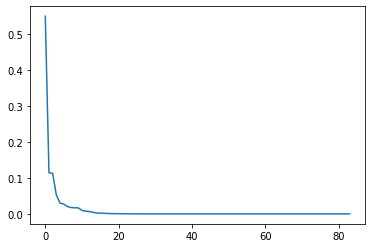

In [53]:
#make a screen plot
import matplotlib.pyplot as plt 
plt.plot(mypca.explained_variance_ratio_)
plt.show()

In [54]:
#Fitting thePCA with the ten components
mypca=PCA(10)
df=mypca.fit_transform(df) 


In [55]:
df

array([[-1.83051835,  0.11885457, -0.22696868, ...,  0.08943218,
         0.13922895,  0.07555795],
       [-1.82804646,  0.08739265, -0.19912815, ...,  0.18613405,
         0.06051623,  0.0826531 ],
       [-1.82223458,  0.03610448, -0.15152542, ...,  0.40291409,
        -0.12999252,  0.27516721],
       ...,
       [-1.5810452 ,  0.10132937,  0.10305473, ..., -0.09251564,
        -0.04478089, -0.12967245],
       [-1.57915072,  0.28993676, -0.01569915, ..., -0.13176462,
         0.14009879,  0.03391417],
       [-1.5754325 ,  0.2544447 ,  0.01428307, ..., -0.06590839,
        -0.04303594, -0.07022954]])

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.33,random_state=42)

In [57]:
#Specify the model and its architecture 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random 

In [58]:
random.seed(42)
simple_model=Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    Dense(1),])

In [59]:
#Obtain a summary of the model architecture 
simple_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [66]:
#compile the model 
simple_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='mean_absolute_error',metrics=['mean_absolute_error'],)

In [68]:
#Fit the model
smod_history=simple_model.fit(x_train,y_train,validation_split=.02,epochs=10,batch_size=32,shuffle=True)

Epoch 1/10
8627/8627 [==============================] - 16s 2ms/step - loss: 2.5772 - mean_absolute_error: 2.5772 - val_loss: 2.4522 - val_mean_absolute_error: 2.4522
Epoch 2/10
8627/8627 [==============================] - 16s 2ms/step - loss: 2.4737 - mean_absolute_error: 2.4737 - val_loss: 2.4830 - val_mean_absolute_error: 2.4830
Epoch 3/10
8627/8627 [==============================] - 16s 2ms/step - loss: 2.4471 - mean_absolute_error: 2.4471 - val_loss: 2.4361 - val_mean_absolute_error: 2.4361
Epoch 4/10
8627/8627 [==============================] - 17s 2ms/step - loss: 2.4321 - mean_absolute_error: 2.4321 - val_loss: 2.5616 - val_mean_absolute_error: 2.5616
Epoch 5/10
8627/8627 [==============================] - 16s 2ms/step - loss: 2.4224 - mean_absolute_error: 2.4224 - val_loss: 2.3897 - val_mean_absolute_error: 2.3897
Epoch 6/10
8627/8627 [==============================] - 17s 2ms/step - loss: 2.4165 - mean_absolute_error: 2.4165 - val_loss: 2.3830 - val_mean_absolute_error: 2.383

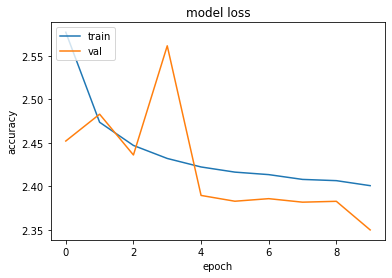

In [69]:
#Plot the training history 
plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()